# Communicate Data Findings 

* Gather
* Assess
* Clean
* Univarite exploration
* Bivariate exploration
* Multivariate exploration

## Gather

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fordgobike.csv')
df.head()

,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,start_time,low_income_trip,subscriber,gender,duration_min,user_age,year,month,week,day,weekday,hour
0,96,43,37.778768,-122.415929,74,37.776435,-122.426244,2017-12-31 16:57:39.654,0,0,1,1335.2,31,2017,12,52,31,6,16
1,88,96,37.766210,-122.426614,284,37.784872,-122.400876,2017-12-31 15:56:34.842,0,0,0,1313.3,53,2017,12,52,31,6,15
2,3167,247,37.867789,-122.265896,239,37.868813,-122.258764,2017-12-31 14:23:14.001,0,1,0,726.7,21,2017,12,52,31,6,14
3,3539,259,37.866249,-122.299371,259,37.866249,-122.299371,2017-12-31 23:49:28.422,0,0,0,75.1,27,2017,12,52,31,6,23
4,2311,24,37.789677,-122.390428,67,37.776639,-122.395526,2017-12-31 23:52:55.581,0,1,1,36.4,28,2017,12,52,31,6,23


In [3]:
stations_df = pd.read_csv('stationData.csv')
stations_df.head()

,stationName,stationId
0,San Francisco Public Library (Grove St at Hyde...,43.0
1,Dolores St at 15th St,96.0
2,Downtown Berkeley BART,245.0
3,Powell St BART Station (Market St at 5th St),5.0
4,Fulton St at Bancroft Way,247.0


## Assess 

In [4]:
df.year.value_counts()

2018    1741556
2019     829277
2017     453159
Name: year, dtype: int64

In [5]:
sum(df.duplicated())

0

In [6]:
df.isnull().any()

bike_id                    False
end_station_id             False
end_station_latitude       False
end_station_longitude      False
start_station_id           False
start_station_latitude     False
start_station_longitude    False
start_time                 False
low_income_trip            False
subscriber                 False
gender                     False
duration_min               False
user_age                   False
year                       False
month                      False
week                       False
day                        False
weekday                    False
hour                       False
dtype: bool

In [7]:
df

,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,start_time,low_income_trip,subscriber,gender,duration_min,user_age,year,month,week,day,weekday,hour
0,96,43,37.778768,-122.415929,74,37.776435,-122.426244,2017-12-31 16:57:39.654,0,0,1,1335.2,31,2017,12,52,31,6,16
1,88,96,37.766210,-122.426614,284,37.784872,-122.400876,2017-12-31 15:56:34.842,0,0,0,1313.3,53,2017,12,52,31,6,15
2,3167,247,37.867789,-122.265896,239,37.868813,-122.258764,2017-12-31 14:23:14.001,0,1,0,726.7,21,2017,12,52,31,6,14
3,3539,259,37.866249,-122.299371,259,37.866249,-122.299371,2017-12-31 23:49:28.422,0,0,0,75.1,27,2017,12,52,31,6,23
4,2311,24,37.789677,-122.390428,67,37.776639,-122.395526,2017-12-31 23:52:55.581,0,1,1,36.4,28,2017,12,52,31,6,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023987,6430,132,37.751819,-122.426614,133,37.755213,-122.420975,2019-04-01 00:09:17.566,0,1,1,3.1,43,2019,4,14,1,0,0
3023988,4972,77,37.773507,-122.416040,78,37.773717,-122.411647,2019-04-01 00:03:02.573,1,1,1,9.0,38,2019,4,14,1,0,0
3023989,3415,269,37.862320,-122.258801,243,37.869360,-122.254337,2019-04-01 00:06:04.237,1,1,1,4.9,22,2019,4,14,1,0,0
3023990,5018,43,37.778768,-122.415929,370,37.787327,-122.413278,2019-04-01 00:01:38.411,1,1,0,7.8,23,2019,4,14,1,0,0


### Tasks 

#### stations_df
* stationID datatype is float when it should be int. 

#### Gobike Ford data
* Join station data to gobike data
* Gender 0 should be female and gender 1 should be male

**Define:**
```stations_df```: *stationID datatype is float when it should be int*

**Code:**


In [8]:
stations_df['stationId'] = stations_df['stationId'].astype(int)

**Test:**

In [9]:
stations_df.dtypes

stationName    object
stationId       int64
dtype: object

In [10]:
df[df['month']== 5].shape[0]

167376

**Define:** join the station names to the Fordgobike data on ```start_station_id``` and ```end_station_id```.

**Code:**

In [11]:
#Create new columns: in stations_df 
stations_df.rename(columns = {'stationId': 'start_station_id'}, inplace=True)
stations_df.columns

Index(['stationName', 'start_station_id'], dtype='object')

In [12]:
stations_df['end_station_id'] = stations_df['start_station_id']
stations_df.head()

,stationName,start_station_id,end_station_id
0,San Francisco Public Library (Grove St at Hyde...,43,43
1,Dolores St at 15th St,96,96
2,Downtown Berkeley BART,245,245
3,Powell St BART Station (Market St at 5th St),5,5
4,Fulton St at Bancroft Way,247,247


In [13]:
#Join
df.merge(stations_df)

,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,start_time,low_income_trip,subscriber,gender,duration_min,user_age,year,month,week,day,weekday,hour,stationName
0,3539,259,37.866249,-122.299371,259,37.866249,-122.299371,2017-12-31 23:49:28.422,0,0,0,75.1,27,2017,12,52,31,6,23,Addison St at Fourth St
1,3134,259,37.866249,-122.299371,259,37.866249,-122.299371,2017-12-25 15:26:15.379,0,0,0,60.0,27,2017,12,52,25,0,15,Addison St at Fourth St
2,2253,259,37.866249,-122.299371,259,37.866249,-122.299371,2017-12-17 09:12:33.171,0,1,1,29.7,57,2017,12,50,17,6,9,Addison St at Fourth St
3,3279,259,37.866249,-122.299371,259,37.866249,-122.299371,2017-12-17 09:12:13.841,0,1,0,30.0,40,2017,12,50,17,6,9,Addison St at Fourth St
4,801,259,37.866249,-122.299371,259,37.866249,-122.299371,2017-12-12 20:25:24.009,0,1,0,1.0,30,2017,12,50,12,1,20,Addison St at Fourth St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73007,4050,405,37.323451,-121.905976,405,37.323451,-121.905976,2019-04-23 06:58:47.205,0,0,1,3.1,31,2019,4,17,23,1,6,Sunol St at San Carlos St
73008,1594,411,37.774018,-122.423809,411,37.774018,-122.423809,2019-04-22 15:31:47.764,0,0,1,18.4,19,2019,4,17,22,0,15,Octavia Blvd at Page St
73009,2689,411,37.774018,-122.423809,411,37.774018,-122.423809,2019-04-20 13:16:53.188,0,0,0,8.0,19,2019,4,16,20,5,13,Octavia Blvd at Page St
73010,75,410,37.750200,-122.386567,410,37.750200,-122.386567,2019-04-16 13:36:27.413,0,0,1,1.4,49,2019,4,16,16,1,13,Illinois St at Cesar Chavez St


**Define**: Gobike data: *Gender 0 should be female and gender 1 should be male.*

**Code:** 

In [14]:
df['gender'] = df['gender'].replace(1, 'male')
df['gender'] = df['gender'].replace(0, 'female')

**Test:**

In [15]:
df['gender'].value_counts()

male      2242002
female     781990
Name: gender, dtype: int64

## Univariate exploration
### 1. What are the months during which bikes are rented the most? 

In [16]:
rentals_pm = []
for month in range(1,13):
    print(month)
    rentals = df[df['month'] == month].shape[0]
    rentals_pm.append(rentals)
rentals_pm = np.array(rentals_pm)
rentals_pm   

1
2
3
4
5
6
7
8
9
10
11
12


array([269085, 273578, 346702, 349639, 167376, 183792, 219604, 248158,
       260205, 286801, 214654, 204398])

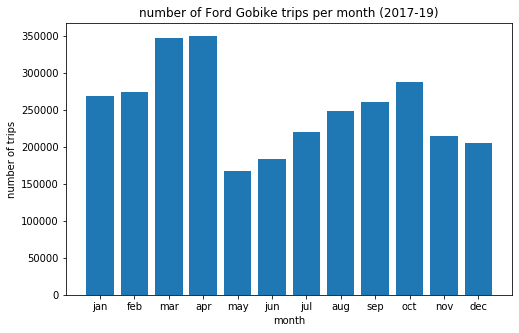

In [17]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.figure(figsize = [8,5])
plt.bar(months, height = rentals_pm)
plt.title('number of Ford Gobike trips per month (2017-19)');
plt.xlabel('month');
plt.ylabel('number of trips');

We see that the months in wich the most bike trips are made are march and april, and those with the least bike trips are may and june. 

### 2. What are the days of the week during which bikes are rented the most? 

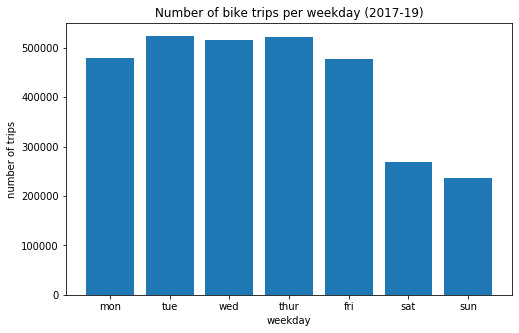

In [18]:
weekdays = ['mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun']
rentals_pwd =np.array(df['weekday'].value_counts().sort_index())
plt.figure(figsize = [8,5]);
plt.bar(weekdays, height = rentals_pwd);
plt.title('Number of bike trips per weekday (2017-19)');
plt.xlabel('weekday')
plt.ylabel('number of trips');

The days on which the most bike trips were made are tuesday, wednesday and thursday. This could mean that people are mainly using the Ford GoBike system to go to work, as there is a big difference between the number of bikes rented on business days versus on week ends (further investigation later). 

### 3. What is the distribution of Gobike user age

In [19]:
df['user_age'].value_counts

<bound method IndexOpsMixin.value_counts of 0          31
1          53
2          21
3          27
4          28
           ..
3023987    43
3023988    38
3023989    22
3023990    23
3023991    49
Name: user_age, Length: 3023992, dtype: int64>

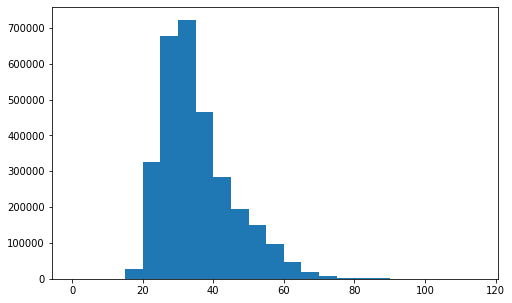

In [20]:
binsize = 5
bins = np.arange(0, 120, binsize);
plt.figure(figsize= [8,5]);
plt.hist(df['user_age'], bins = bins);

We can see that the distribution is skewed to the right, with a majority of bike users being aged 20-40. 

In [21]:
df['user_age'].mean()

35.004155434273635

The averge user is 35 years old. 

### 4. What is the bike trip duration distribution like? 

Text(0, 0.5, 'number of trips')

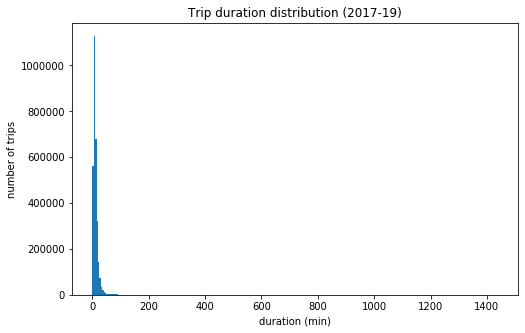

In [22]:
binsize = 5
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)
plt.figure(figsize = [8,5])
plt.hist(df['duration_min'], bins = bins);
plt.title('Trip duration distribution (2017-19)');
plt.xlabel('duration (min)');
plt.ylabel('number of trips')

In this situation, we see that our data is heavily skewed. To get a better view, we could apply a **log transformation** to our data set of the type: 
> $(\Delta t_1, \Delta t_2, ... \Delta t_n) \to \log(\Delta t_1, \Delta t_2, ... \Delta t_n) $ Where $t_i$ is the observed duration of the ith trip.


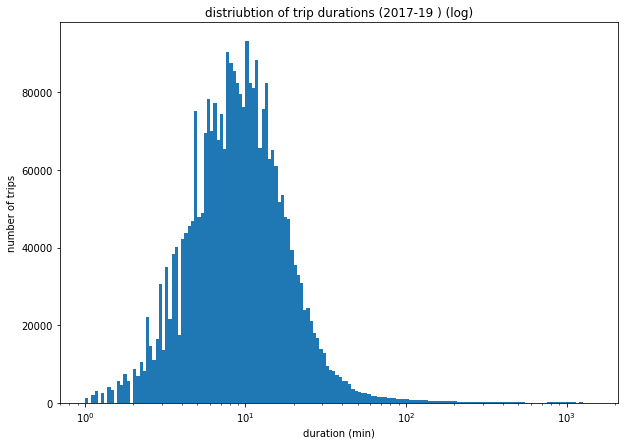

In [23]:
# Transform our bins
log_binsize = 0.02
log_bins = 10**np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)
plt.figure(figsize= [10,7]);
plt.hist(df['duration_min'], bins = log_bins)
plt.xscale('log')
plt.title('distriubtion of trip durations (2017-19 ) (log)');
plt.xlabel('duration (min)');
plt.ylabel('number of trips');

Now it is easier to visualise our data since it is more symmetric. We can see that most trip durations last between 2-30 min. 

## Bivariate exploration 
### 1. Do subscribers take longer trips than non subscribers on average?

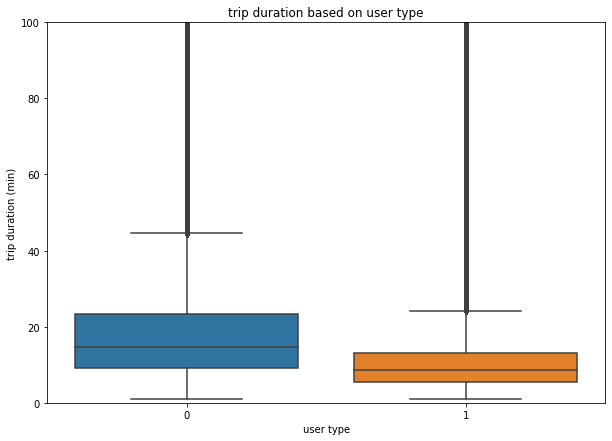

In [24]:
plt.figure(figsize =[10,7])
sns.boxplot(x= df['subscriber'], y = df['duration_min']);
plt.ylim([0,100])
plt.ylabel('trip duration (min)');
plt.xlabel('user type');
plt.title('trip duration based on user type');

It seems like overall, non subscribers perform longer bike trips than subscribers. 

### 2. Do younger users make longer trips than older users on average? 

Since our dataset is huge and certain computation times may be too long, it could be useful to take a random sample from our dataset. 

In [25]:
sample = df[['user_age', 'duration_min']].sample(20000)

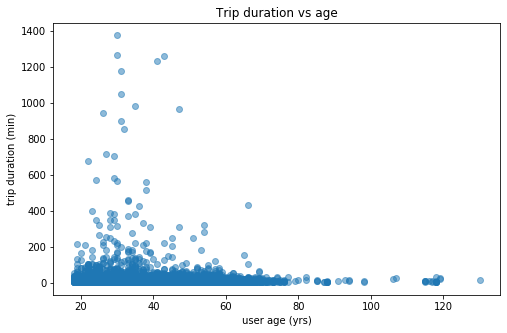

In [26]:
plt.figure(figsize = [8,5]);
plt.scatter(x = sample['user_age'], y= sample['duration_min'], alpha =0.5)
plt.title('Trip duration vs age');
plt.xlabel('user age (yrs)');
plt.ylabel('trip duration (min)');

Even with the alpha lowered, there are still too many points between 0-100min . Let's focus on the data in this range and plot a heatmap to get a better overiew. 

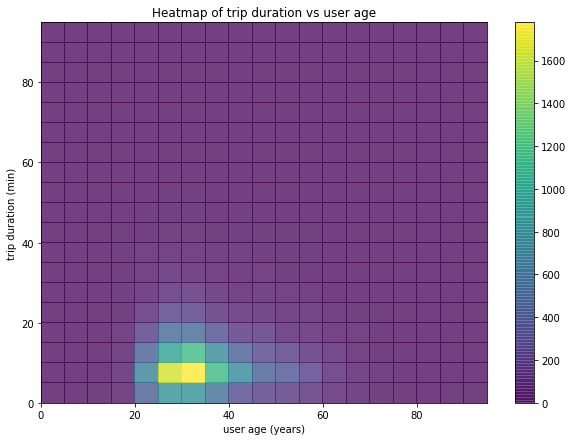

In [27]:
plt.figure(figsize =[10,7])
xbin = np.arange(0, 100, 5);
ybin = np.arange(0, 100, 5 );
plt.hist2d(sample['user_age'], sample['duration_min'],  bins = (xbin, ybin), alpha = 0.75);
plt.xlabel('user age (years)');
plt.ylabel('trip duration (min)');
plt.title('Heatmap of trip duration vs user age')
plt.colorbar();

It is now clearer that most trips are performed by users aged around 20-40 and last between 5-20 min 

### 3. Do we have evidence to support the claim that Ford GoBikes are used mostly for work commute? 

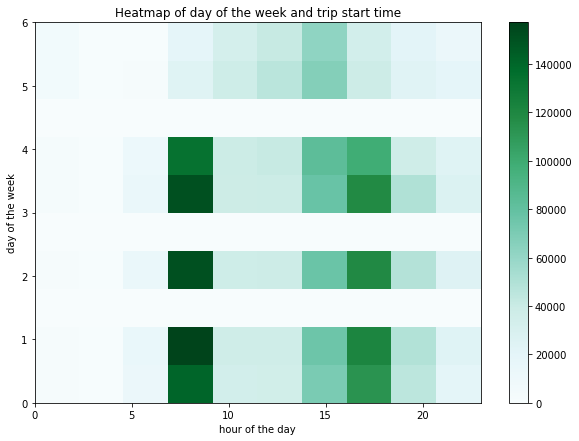

In [28]:
plt.figure(figsize = [10,7]);
plt.title('Heatmap of day of the week and trip start time');
plt.hist2d(df['hour'], df['weekday'], cmap = 'BuGn');
plt.ylabel('day of the week');
plt.xlabel('hour of the day');
plt.colorbar();


This heatmap does seem to indicate that Ford Gobikes are mainly used for travelling to work. We can see a large concentration of trips made on Mondays, Tuesdays, Wednesdays, Thursdays and Fridays between 8-10AM and 5-7PM which are the start and end of usual work hours. 

## Multivariate Exploration

### 1. Is there a correlation between average trip speed , user age and gender? 

The trip speed is given by: $$s = \frac { d}{ \Delta t} $$ 


**Computing the distance using spherical polar coordinates** 

So we are given the inital and final latitude and longitude $(\theta_i, \phi_i) \to (\theta_f, \phi_f)$ if we assume that our rider stays at the same distance from earth's centre $R$. 

Using this information (though the math is complicated) we can derive the Haversine formula which gives us the distance $d$ between 2 points on a perfect sphere: 
$$d =2R \arcsin \left( \sqrt{\sin^2 \left(\frac {\theta_f - \theta i}2 \right ) + \cos(\theta_i) \cos(\theta_f)  \sin^2 \left( \frac {\phi_f - \phi_i}2 \right) }  \right )$$

In [29]:

def great_circle_distance(theta_i, theta_f, phi_i, phi_f, R):
    ''' This function takes as input the start and end latitude, the start and end longitude 
    and the radius of the earth and returns the great circle distance in m. We assume that the 
    angles are in radians. So we will need to convert them before calling the function. '''
    
    dlat = theta_f - theta_i
    dlong = phi_f - phi_i 
    arg = np.sin(dlat/2)**2 + np.cos(theta_i)*np.cos(theta_f)*np.sin(dlong/2)**2
    d = 2*R*np.arcsin(np.sqrt(arg))
    return d 
    

# latitudes 
theta_i = np.radians(np.array(df['start_station_latitude']))
theta_f = np.radians(np.array(df['end_station_latitude']))

#longitudes 
phi_i = np.radians(np.array(df['start_station_longitude']))
phi_f = np.radians(np.array(df['end_station_longitude']))

#earth radius
R = 6.371e6 

In [30]:
dist = great_circle_distance(theta_i, theta_f, phi_i, phi_f, R)
dist

array([ 942.9311486 , 3069.72709969,  636.33938353, ...,  875.43905521,
        979.82433392, 1473.55870857])

In [31]:
# Convert min to seconds 
t = df['duration_min']* 60 

In [32]:
#Create array containing velocity for each trip
speed = dist/t

In [33]:
#Check the mean
speed.mean()

2.88207810716911

In [34]:
speed.max()

73524.30261323835

The average bike speed is around $2$m/s. Our results is slightly. This could be for two reasons:

* The mean is being 'pulled' by extreme values such as the max speed which is unrealistic. 
* The people who used Ford GoBikes are adept bikers and ride at above average speeds. 

In [35]:
df['speed'] =speed

In [36]:
sample = df.sample(500)

In [37]:
#Create intervals for the age variable
ages_bins = [18,25,50, 65, 100]
df['age_discrete'] = pd.cut(df['user_age'], bins = ages_bins, include_lowest = True)

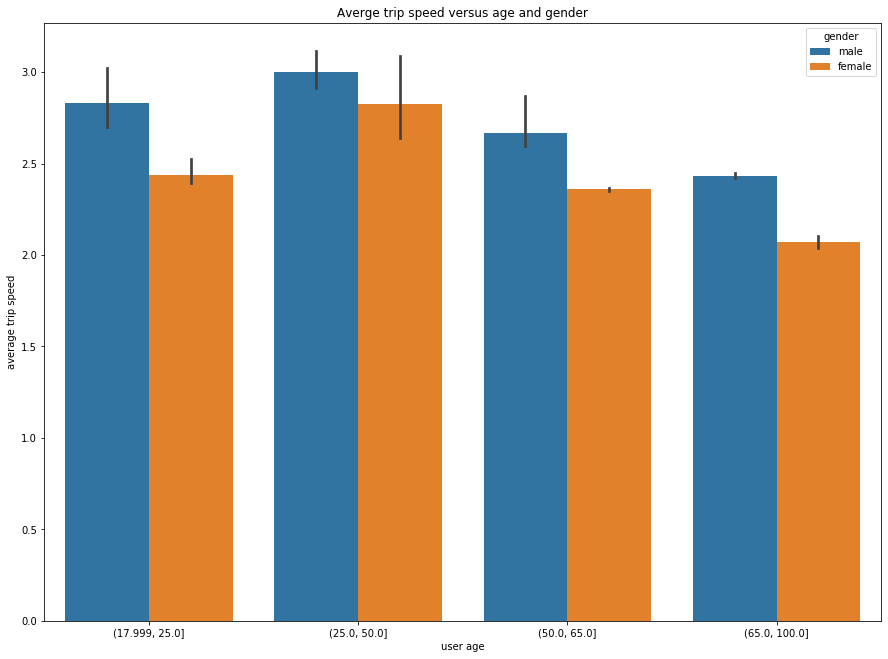

In [38]:
plt.figure(figsize= [15,11]);
sns.barplot(x = 'age_discrete', y='speed', hue = 'gender' ,data = df);
plt.xlabel('user age');
plt.ylabel('average trip speed');
plt.title('Averge trip speed versus age and gender');

These results show that the average the averge trip speed for men is slightly higher than for women over all age brackets. We also see that the fastest riders are in the age bracket 25-50 years. Finally, we observe that overall, travel speed declines from the age of 50 onwards for both genders. 